# [Delitos en CABA] - Aplicación de la técnica K-Means Clustering

Se utilizará el método k-means para descubrir agrupaciones en un conjunto de datos utilizando aprendizaje no supervisado. El dataset original puede encontrarse en el sitio https://mapa.seguridadciudad.gob.ar/, el cual contiene datos estadísticos de delitos cometidos de enero-2016 a dicimebre-2018 en la Ciudad Autónoma de Buenos Aires (CABA).

A efectos de la aplicación del método k-means, el dataset fue transformado y divido en las 7 categorías de delito, así como también fueron agregados los datos de la cantidad de habitantes de cada uno de los 48 barrios, según información consultada en https://es.wikipedia.org/wiki/Barrios_de_la_ciudad_de_Buenos_Aires#Barrios.

El análisis consta de los siguientes pasos:

1. Importación de las bibliotecas necesarias y lectura del dataset 
2. Normalización de los datos 
3. Selección del número óptimo de grupos para los datos 
4. Aplicación del método k-means
5. Visualización y Exportación de los resultados
6. Conclusiones

# 1. Importación de las bibliotecas necesarias y lectura del dataset 

In [1]:
import numpy as np  # linear algebra
import pandas as pd # data processing, CSV file I/O

In [2]:
crime_rates=pd.read_csv("delitos_caba_transform.csv", delimiter=";", index_col=0)

In [3]:
# se visualizan las primeras 5 lineas
crime_rates.head() 

,homicidio_doloso,homicidio_seg_vial,hurto_sin_violencia,hurto_automotor,lesiones_seg_vial,robo_con_violencia,robo_automotor,poblacion
AGRONOMIA,0,1,414,82,73,671,38,13963
ALMAGRO,4,4,3829,841,337,9105,214,128206
BALVANERA,23,8,9095,422,668,12837,142,137521
BARRACAS,26,11,2434,479,317,6288,441,73377
BELGRANO,4,3,4088,566,292,6457,115,126831


In [4]:
crime_rates.describe()

,homicidio_doloso,homicidio_seg_vial,hurto_sin_violencia,hurto_automotor,lesiones_seg_vial,robo_con_violencia,robo_automotor,poblacion
count,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000
mean,8.265306,5.387755,2291.857143,367.551020,200.673469,4089.265306,199.857143,58388.408163
std,11.736296,4.974168,2289.033548,275.262909,149.369423,3357.849223,200.485349,47452.690422
min,0.000000,0.000000,57.000000,9.000000,0.000000,226.000000,5.000000,0.000000
25%,1.000000,1.000000,1052.000000,144.000000,102.000000,1802.000000,73.000000,33058.000000
50%,4.000000,4.000000,1582.000000,311.000000,153.000000,3080.000000,135.000000,44234.000000
75%,10.000000,8.000000,2434.000000,445.000000,262.000000,5089.000000,192.000000,64932.000000
max,56.000000,19.000000,10603.000000,1127.000000,725.000000,15165.000000,852.000000,225970.000000


# 2. Normalización de los datos

In [5]:
# Estandarización de los datos en una distribución normal
from sklearn import preprocessing
crime_rates_standardized = preprocessing.scale(crime_rates)
print(crime_rates_standardized)
crime_rates_standardized = pd.DataFrame(crime_rates_standardized)

[[-7.11549809e-01 -8.91249615e-01 -8.28872658e-01 -1.04812587e+00
  -8.63607446e-01 -1.02854192e+00 -8.15692842e-01 -9.45906059e-01]
 [-3.67194840e-01 -2.81883599e-01  6.78483819e-01  1.73781248e+00
   9.22138386e-01  1.50921387e+00  7.12741318e-02  1.48655659e+00]
 [ 1.26849126e+00  5.30604422e-01  3.00285841e+00  1.99857049e-01
   3.16108486e+00  2.63215726e+00 -2.91575994e-01  1.68489162e+00]
 [ 1.52675749e+00  1.13997044e+00  6.27408365e-02  4.09077716e-01
   7.86854611e-01  6.61590194e-01  1.21525994e+00  3.19137188e-01]
 [-3.67194840e-01 -4.85005604e-01  7.92804560e-01  7.28414523e-01
   6.17749892e-01  7.12441596e-01 -4.27644791e-01  1.45728008e+00]
 [-5.39372324e-01  1.24360411e-01 -3.09353310e-01  4.34771482e-01
   1.64549245e-01 -2.98568535e-01  1.23541828e+00 -2.73078668e-01]
 [ 1.49337614e-01  5.30604422e-01  1.04086732e+00  2.54900138e+00
   1.50385862e+00  1.80920705e+00  1.25053704e+00  2.50580492e+00]
 [-1.95017355e-01 -6.88127609e-01 -4.63399404e-01 -8.35234670e-01
  -

C:\Users\usuario\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  This is separate from the ipykernel package so we can avoid doing imports until


# 3. Selección del número óptimo de grupos para los datos

Se utiliza el método Elbow para decidir el Nro. de Clusters del modelo

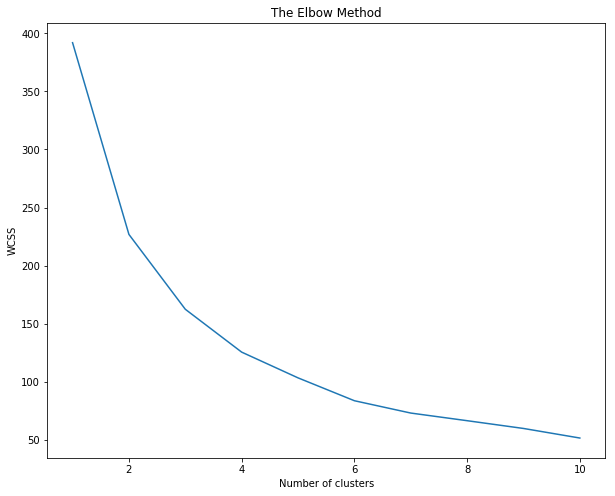

In [6]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10, 8))
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(crime_rates_standardized)
    wcss.append(kmeans.inertia_)           # criterio sobre el cual el k-mean clustering funciona
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Se puede notar que la curva empieza a nivelarse a partir de k = 4, por lo tanto, ese será el nro. de clusters

# 4. Aplicación del método k-means

In [7]:
# Ajuste del algoritmo K-Means al dataset
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(crime_rates_standardized)

y_kmeans

array([0, 3, 2, 3, 3, 3, 2, 0, 0, 0, 3, 1, 0, 0, 3, 3, 0, 3, 0, 3, 2, 3,
       3, 0, 0, 0, 0, 2, 3, 3, 3, 3, 0, 0, 0, 3, 0, 3, 0, 1, 0, 0, 0, 0,
       0, 0, 3, 3, 0])

In [8]:
# inicializacion del cluster en 1 en lugar de cero
y_kmeans1=y_kmeans+1

# Nueva lita llamada cluster
cluster = list(y_kmeans1)

# Se agrega el cluster al dataset
crime_rates['cluster'] = cluster

In [9]:
# Mean of clusters 1 to 4
kmeans_mean_cluster = pd.DataFrame(round(crime_rates.groupby('cluster').mean(),1))
kmeans_mean_cluster

,homicidio_doloso,homicidio_seg_vial,hurto_sin_violencia,hurto_automotor,lesiones_seg_vial,robo_con_violencia,robo_automotor,poblacion
cluster,,,,,,,,
1,2.2,1.8,983.4,213.2,92.6,1776.3,95.6,29387.5
2,46.5,19.0,3883.0,1054.0,338.0,8914.0,789.0,128474.0
3,12.0,9.2,7566.0,702.0,552.0,11999.5,208.0,174374.8
4,11.1,7.7,2666.8,419.8,248.8,4837.7,267.8,63225.5


In [10]:
# Se halla la correlación de variables
variables_correlation = kmeans_mean_cluster[['homicidio_doloso', 'homicidio_seg_vial', 'hurto_sin_violencia', 'hurto_automotor', 'lesiones_seg_vial', 'robo_con_violencia', 'robo_automotor']]
variables_correlation.corr()

,homicidio_doloso,homicidio_seg_vial,hurto_sin_violencia,hurto_automotor,lesiones_seg_vial,robo_con_violencia,robo_automotor
homicidio_doloso,1.000000,0.971759,0.195960,0.921090,0.284884,0.463117,0.995154
homicidio_seg_vial,0.971759,1.000000,0.390879,0.971696,0.481385,0.631530,0.958835
hurto_sin_violencia,0.195960,0.390879,1.000000,0.561578,0.992642,0.959862,0.120387
hurto_automotor,0.921090,0.971696,0.561578,1.000000,0.631784,0.770935,0.885563
lesiones_seg_vial,0.284884,0.481385,0.992642,0.631784,1.000000,0.978857,0.215694
robo_con_violencia,0.463117,0.631530,0.959862,0.770935,0.978857,1.000000,0.393596
robo_automotor,0.995154,0.958835,0.120387,0.885563,0.215694,0.393596,1.000000


# Barrios en el cluster 1

Previsualización de los barrios que quedaron agrupados en el cluster 1

In [11]:
crime_rates[crime_rates['cluster']==1]

,homicidio_doloso,homicidio_seg_vial,hurto_sin_violencia,hurto_automotor,lesiones_seg_vial,robo_con_violencia,robo_automotor,poblacion,cluster
AGRONOMIA,0,1,414,82,73,671,38,13963,1
CHACARITA,6,2,1242,140,143,2813,46,25778,1
COGHLAND,0,0,419,128,35,905,27,18021,1
COLEGIALES,1,2,1173,292,114,2470,51,52391,1
FLORESTA,2,1,1493,422,110,2444,124,39473,1
LA BOCA,11,3,1219,221,144,3251,175,49745,1
MONTE CASTRO,2,1,1045,281,60,1485,161,34584,1
NUÑEZ,1,6,1784,384,164,2952,90,53005,1
PARQUE CHAS,0,0,509,144,35,626,22,20657,1
PARQUE PATRICIOS,10,2,1692,345,150,3717,187,40885,1


# 5. Exportación del resultado a formato csv

In [17]:
from IPython.display import HTML
import base64

df = crime_rates
def create_download_link( df, title = "Download CSV file", filename = "out_kmeans_CABA.csv"):  
    csv = df.to_csv()
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)

create_download_link(df)

# 6. Conclusiones

Cluster 1: 
Agrupa a los barrios en los cuales la tasa de criminalidad es mucho menor en relación a los demás barrios, sin embargo, puede notar que también se encuentran entre los barrios menos poblados.

Cluster 2: 
En el se encuentran los barrios con mayor indice de criminalidad en 4 de los 7 tipos de delitos y también son de los más populosos.

Cluster 3: 
Se destacan por ser los barrios más populosos y en los cuales existe la mayor cantidad de robo_con_violencia y lesiones_seg_vial, lo cual también se puede apreciar en la matriz de correlación donde ambas variables son las más relacionadas.

Cluster 4: 
Es un grupo similar al cluster 1 pero donde se nota un mayor indice un poco mayor de población en comparación al cluster 1.